<AxesSubplot:xlabel='petal length (cm)', ylabel='petal width (cm)'>

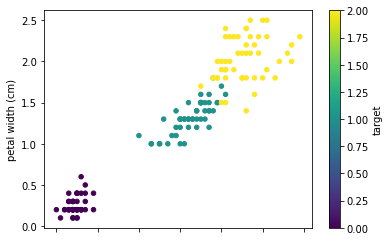

In [1]:
# we load the data

from sklearn.datasets import load_iris 
import pandas as pd
import numpy as np


iris = load_iris(as_frame=True)
X = iris.data.iloc[:,[2,3]]
y =  iris.target.astype(int)

pd.concat([iris.data, iris.target], axis=1).plot.scatter(x='petal length (cm)',y='petal width (cm)',c='target',colormap='viridis')

In [2]:
# we divide data to train and test sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)



In [3]:
# we implement perceptrons 

from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score


listAcc = list()
listWeighths = list()

for i in range(0,3):

    # first class

    y1Train = (y_train == i).astype(int)
    y1Test = (y_test == i).astype(int)

    per1_clf = Perceptron()
    per1_clf.fit(X_train,y1Train)

    # predictions and accuracy on training set

    y_pred_train = per1_clf.predict(X_train)
    accTrain1 = accuracy_score(y1Train, y_pred_train)

    # predictions and accuracy on test set

    y_pred_test = per1_clf.predict(X_test)
    accTest1 = accuracy_score(y1Test, y_pred_test)


    #print(accTrain1)
    #print(accTest1)
    #print(per1_clf.intercept_)
    #print(per1_clf.coef_)
    
    
    listAcc.append((accTrain1,accTest1))
    listWeighths.append((per1_clf.intercept_[0],per1_clf.coef_[0][0],per1_clf.coef_[0][1]))


    



print(listAcc)
print(listWeighths)
    
    
    



[(1.0, 1.0), (0.6416666666666667, 0.7), (0.85, 0.8666666666666667)]
[(4.0, -1.4999999999999993, -1.6999999999999997), (-9.0, 6.800000000000028, -16.099999999999973), (-37.0, 1.8999999999999861, 21.499999999999993)]


In [4]:
import pickle

# we pickle the data


acc = open('per_acc.pkl', 'wb')
pickle.dump(listAcc, acc)
acc.close()


weights = open('per_wght.pkl', 'wb')
pickle.dump(listWeighths, weights)
weights.close()

In [5]:
import tensorflow as tf
from tensorflow import keras

In [6]:
# we prepare data for 2 task
import numpy as np

X2 = np.array([[0, 0], [0, 1],[1, 0],[1, 1]])
y2 = np.array([0,1, 1, 0])

In [7]:
# we train our perceptron

from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score



per_XOR = Perceptron()
per_XOR.fit(X2,y2)

pred_XOR = per_XOR.predict(X2)

accXOR = accuracy_score(y2, pred_XOR)
print(accXOR)







0.5


In [8]:
import tensorflow as tf
from tensorflow import keras


foundedModel = None

for i in range(0,100):

        print("iteration" + str(i+1))

        modelTmp = keras.models.Sequential()

        modelTmp.add(keras.layers.Dense(2, activation="tanh"))
        modelTmp.add(keras.layers.Dense(units=1, activation='sigmoid'))

        opt = tf.keras.optimizers.Adam(learning_rate=0.15)
        modelTmp.compile(loss='BinaryCrossentropy', optimizer=opt)

        history = modelTmp.fit(X2, y2, epochs=100, verbose=False)
        #print(history.history['loss'])

        XOR_predictions = modelTmp.predict(X2)
        print(XOR_predictions)


        if XOR_predictions[0][0] < 0.1 and XOR_predictions[3][0] < 0.1 and XOR_predictions[1][0] > 0.9 and XOR_predictions[2][0] > 0.9:
            print("good model")
            foundedModel = modelTmp
            break
            




iteration1
[[0.00806785]
 [0.99728477]
 [0.99712884]
 [0.00563067]]
good model


In [9]:
# we pickel weights



weight = foundedModel.get_weights()

import pickle

# we pickle the data

weights = open('mlp_xor_weights.pkl', 'wb')
pickle.dump(weight, weights)
weights.close()


